原文链接：https://www.aideeplearning.cn/k%e9%82%bb%e5%b1%85%e7%ae%97%e6%b3%95%e8%bf%9b%e8%a1%8c%e9%b8%a2%e5%b0%be%e8%8a%b1%e5%88%86%e7%b1%bb%e9%a1%b9%e7%9b%ae/

In [37]:
# import ssl
# import urllib.request
 
# # 禁用SSL证书验证（不推荐，仅作为临时解决方案）
# context = ssl.create_default_context()
# context.check_hostname = False
# context.verify_mode = ssl.CERT_NONE
 
# # 使用之前禁用SSL证书验证的context
# response = urllib.request.urlopen('https://100.98.147.35/ngte/bj/production/eenniyh/logs/20240807233547/json/suite.json', context=context)
# print(response.context())

In [42]:
import pandas as pd
import ssl

context.verify_mode = ssl.CERT_NONE
ssl._create_default_https_context = ssl._create_unverified_context
# df = pd.read_json("https://ngte-ctrweb.sero.wh.rnd.internal.ericsson.com/ngte/production/rsapemo/logs/20240314124157/json/suite.json")
df = pd.read_json("https://100.98.147.35/ngte/bj/production/eenniyh/logs/20240807233547/json/suite.json")
#df = pd.read_json("data/TestResults_All.json")

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: EE certificate key too weak (_ssl.c:1000)>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    1000 non-null   object 
 1   uuid                   1000 non-null   object 
 2   startTimeInMillis      1000 non-null   int64  
 3   runBy                  1000 non-null   object 
 4   startTime              1000 non-null   object 
 5   endTime                1000 non-null   object 
 6   endTimeInMillis        1000 non-null   int64  
 7   testSuiteName          1000 non-null   object 
 8   testSuiteResult        1000 non-null   object 
 9   locationUserGroup      1000 non-null   object 
 10  runId                  1000 non-null   object 
 11  tag                    1000 non-null   object 
 12  suiteId                988 non-null    float64
 13  parentSuiteId          988 non-null    float64
 14  workspace              988 non-null    object 
 15  works

In [3]:
df.describe()

,startTimeInMillis,endTimeInMillis,suiteId,parentSuiteId,workspaceid,testplanid,baselineId
count,1.000000e+03,1.000000e+03,988.000000,988.000000,988.000000,988.000000,988.000000
mean,1.720968e+12,1.700322e+12,31836.917004,196.927126,1527.061741,2750.465587,1479.818826
std,5.193613e+08,1.874831e+11,3702.126424,2536.089843,140.470642,298.238958,145.434578
min,1.720156e+12,0.000000e+00,21016.000000,-1.000000,1168.000000,1724.000000,876.000000
25%,1.720538e+12,1.720537e+12,31292.000000,-1.000000,1480.000000,2628.000000,1411.000000
50%,1.720795e+12,1.720794e+12,33739.000000,-1.000000,1542.000000,2829.000000,1527.000000
75%,1.721359e+12,1.721359e+12,33982.250000,-1.000000,1638.000000,3003.000000,1569.000000
max,1.721877e+12,1.721878e+12,34417.000000,34317.000000,1697.000000,3152.000000,1659.000000


In [4]:
df = df.drop('testParentSuiteName', axis=1)
df = df.drop('approveStatus', axis=1)
df = df.drop('parentSuiteId', axis=1)
df = df.drop('workspace', axis=1)

In [5]:
# df['Duration'] = df.apply(lambda x: (x['endTimeInMillis'] - x['startTimeInMillis']) / 1000, axis=1)
df.insert(df.columns.get_loc('uuid')+1, 'DurationSecond', (df['endTimeInMillis'] - df['startTimeInMillis']) / 1000)
#df.insert(df.columns.get_loc('DurationSecond')+1, 'failToSetup', df['DurationSecond'] < 270)

## 删除原始时间列

In [6]:
df = df.drop('startTimeInMillis', axis=1)
df = df.drop('endTimeInMillis', axis=1)
df = df.drop('startTime', axis=1)
df = df.drop('endTime', axis=1)

## 删除执行时长小于0大于2000s的行

In [7]:
df = df.drop(df[df['DurationSecond'] < 0].index)
df = df.drop(df[df['DurationSecond'] > 10000].index)
df = df.drop(df[df['DurationSecond'] > 2000].index)

In [8]:
df.count()

_id                      740
uuid                     740
DurationSecond           740
runBy                    740
testSuiteName            740
testSuiteResult          740
locationUserGroup        740
runId                    740
tag                      740
suiteId                  728
workspaceid              728
product                  728
productnumber            728
testplanid               728
testplan                 728
baselineId               728
baselineName             728
limitconfigid            728
limitconfigname          728
requirementtagid         728
requirementTag           728
mappingLimitIdWithTag    728
sourceTag                728
templateName             728
dtype: int64

In [9]:
keys = ['Compliance', 'Sensitivity', 'Blocking', "Selectivity", 
        'OutputPower', 'Aclr', 'Spur', 'FrequencyTolerance', 'TimeAlignment', 'Evm', 'Intermodulation', 'DynamicRange', 
        'Obue', 'BranchIsolation', 'RbPower', 'RsPower', 'Vswr']
values = ['1001', '1002', '1003', '1004', 
          '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010','2011', '2012', '2013']
dict1 = dict(zip(keys, values))
# dict1

In [10]:
import numpy as np
for key, value in dict1.items():
    df['templateName'] = df['templateName'].str.replace('.*'+ key + '.*', value, regex=True)
df = df.dropna(axis=0)
df['templateName'] = df['templateName'].astype(int)
# df['templateName'].unique()

## Only Keep Compliance test case

In [11]:
df = df.drop(df[df['templateName'] != 1001].index)

In [12]:
keys2 = ['ERROR', 'FAILED', 'PASSED', "STARTED", 'TERMINATED']
values2 = ['1', '2', '3', '4', '5']
dict2 = dict(zip(keys2, values2))
# dict2

In [13]:
import numpy as np
for key, value in dict2.items():
    df['testSuiteResult'] = df['testSuiteResult'].str.replace('.*'+ key + '.*', value, regex=True)
df['testSuiteResult'] = df['testSuiteResult'].astype(int)
# df['testSuiteResult'].unique()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 971
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    80 non-null     object 
 1   uuid                   80 non-null     object 
 2   DurationSecond         80 non-null     float64
 3   runBy                  80 non-null     object 
 4   testSuiteName          80 non-null     object 
 5   testSuiteResult        80 non-null     int32  
 6   locationUserGroup      80 non-null     object 
 7   runId                  80 non-null     object 
 8   tag                    80 non-null     object 
 9   suiteId                80 non-null     float64
 10  workspaceid            80 non-null     float64
 11  product                80 non-null     object 
 12  productnumber          80 non-null     object 
 13  testplanid             80 non-null     float64
 14  testplan               80 non-null     object 
 15  baselineId  

In [15]:
df.describe()

,DurationSecond,testSuiteResult,suiteId,workspaceid,testplanid,baselineId,templateName
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0
mean,810.168012,2.050000,33018.175000,1611.825000,2532.437500,1399.512500,1001.0
std,366.665136,0.979537,929.098839,56.493928,361.520483,186.204325,0.0
min,212.061000,1.000000,31795.000000,1419.000000,1724.000000,881.000000,1001.0
25%,626.668250,1.000000,31818.000000,1569.000000,2256.000000,1274.000000,1001.0
50%,759.820000,2.500000,33086.000000,1618.000000,2596.000000,1465.000000,1001.0
75%,1056.305750,3.000000,33749.000000,1663.000000,2965.000000,1598.000000,1001.0
max,1596.690000,3.000000,34417.000000,1663.000000,2965.000000,1598.000000,1001.0


In [16]:
X = df[['DurationSecond', 'testplanid']]
X.head()
df['testplanid'].unique()

array([2256., 1724., 2596., 2965.])

In [17]:
df['DurationSecond'].unique()
# df.describe()

array([ 963.53 ,  806.029,  725.057,  946.853,  638.049,  789.224,
        246.659,  236.272,  241.208,  785.009,  236.773,  237.111,
        246.286,  822.749, 1560.406,  967.619,  705.442,  710.131,
        702.684,  873.81 ,  212.061,  801.5  ,  637.182,  654.375,
       1542.758,  706.117,  687.463,  709.365,  805.458,  689.353,
        335.49 ,  526.27 ,  363.851,  230.225,  233.799, 1438.32 ,
       1441.533,  692.756,  638.801,  645.343,  660.182,  864.643,
        763.815,  761.504, 1361.985, 1368.63 , 1354.024, 1372.518,
        758.136,  779.977,  661.316,  681.992, 1247.029, 1388.336,
        884.148, 1287.99 , 1596.69 ,  751.073, 1101.152, 1293.335,
       1049.653, 1148.883,  983.   , 1216.897, 1215.849, 1076.264,
       1244.76 ,  595.127,  790.32 ,  568.233,  591.452,  574.726,
        681.942,  571.709,  576.39 , 1336.101,  802.584,  818.559,
        233.627,  365.969])

In [18]:
y = df['testSuiteResult']
# y.head()

## Pair Plot

查看数据特征如何相互交互的快速方法

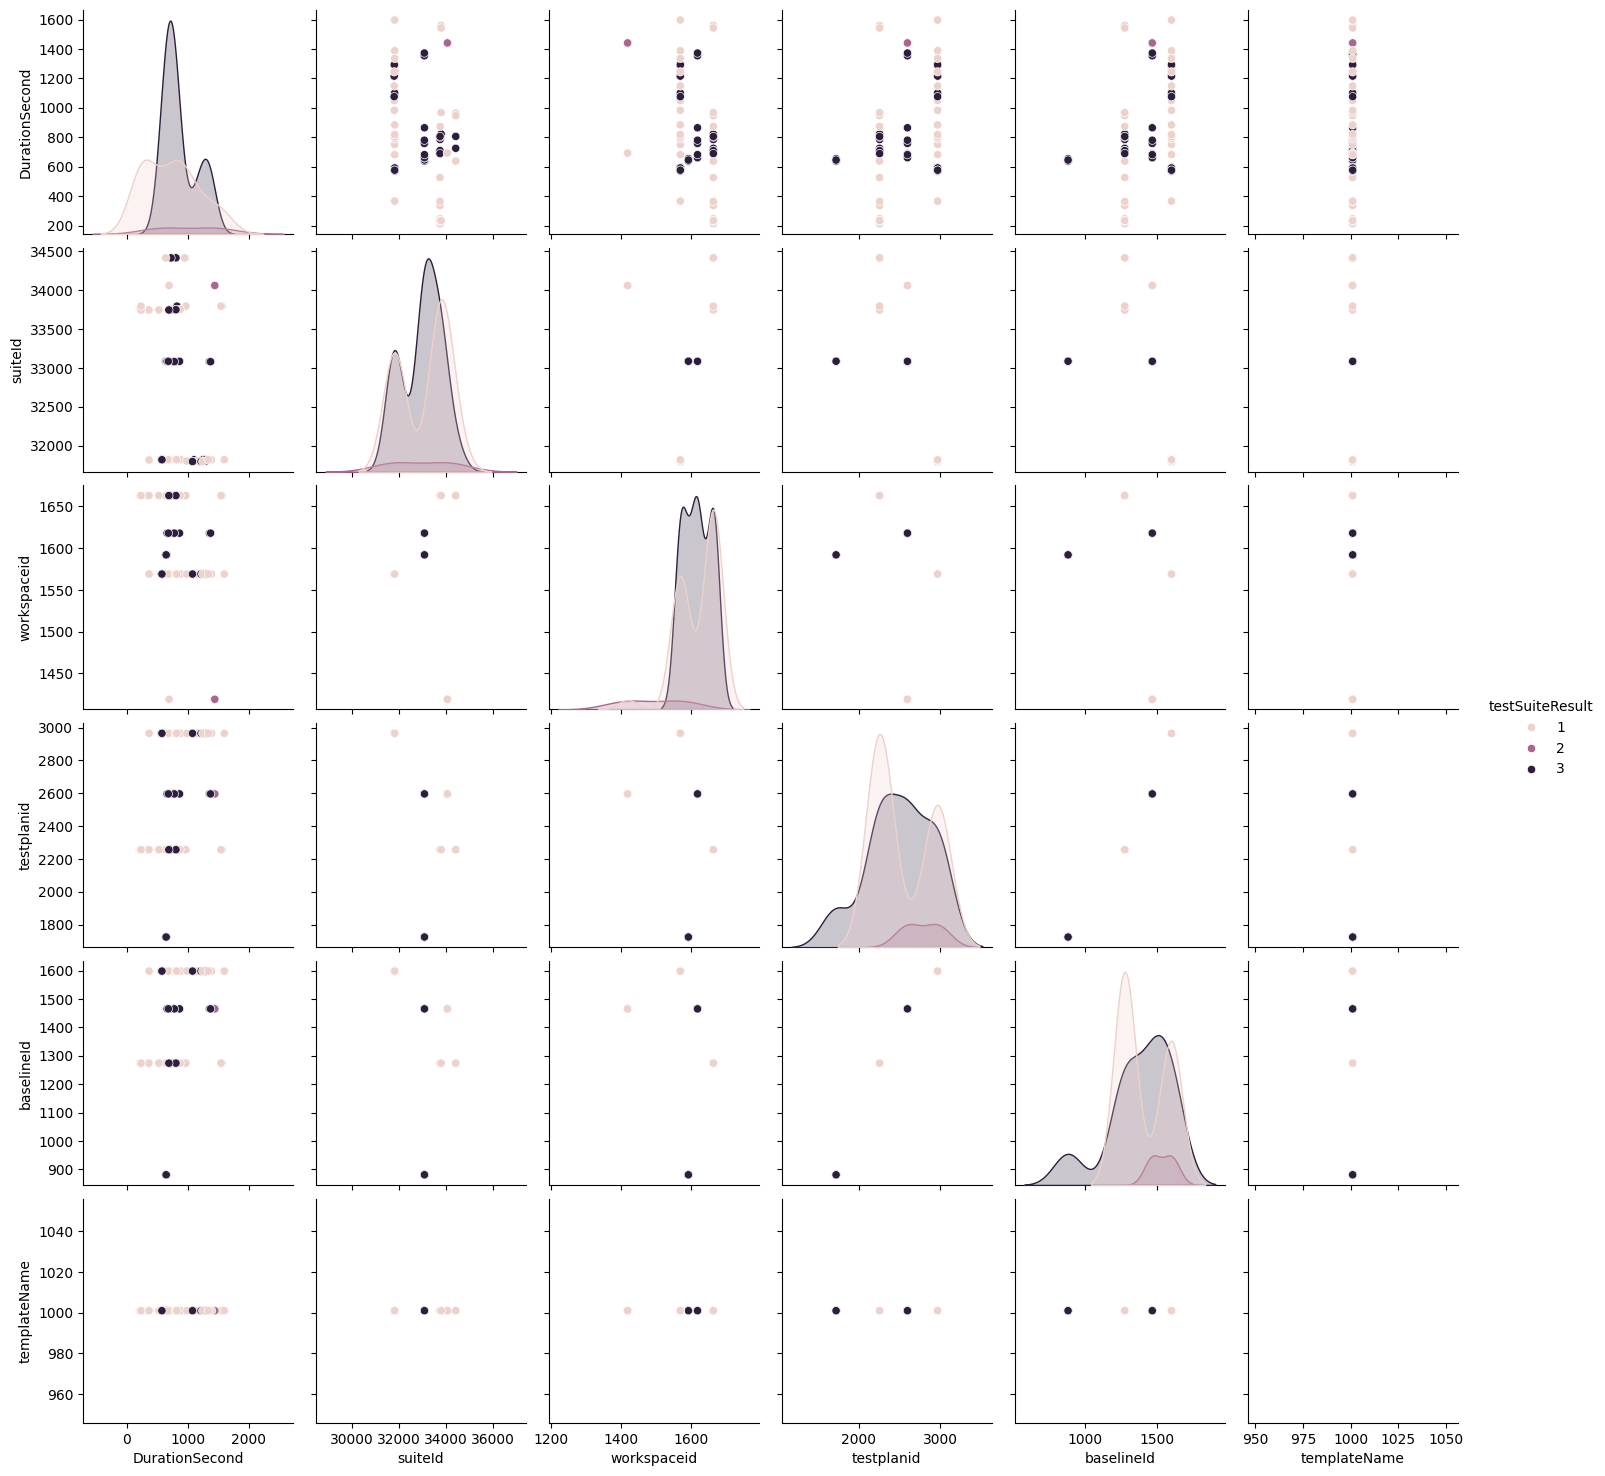

In [19]:
import seaborn as sns
sns.pairplot(data=df, hue='testSuiteResult')

## 训练模型

## 训练KNN模型 (6 neighbors)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### 绘制决策边界

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


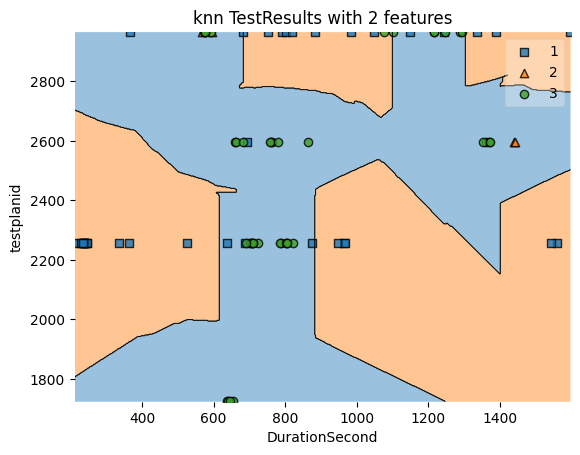

In [21]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
plot_decision_regions(np.array(X), np.array(y), clf=knn, legend=1)

plt.xlabel('DurationSecond')
plt.ylabel('testplanid')
plt.title('knn TestResults with 2 features')
plt.show()

## 评估模型

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

features = df[['DurationSecond', 'testplanid']]
labels = df['testSuiteResult']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.8, random_state=64)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

predict = knn.predict(X_test)
print('accuracy_score =', accuracy_score(predict, y_test))
print('precision_score =', precision_score(predict, y_test, average='weighted'))
print('recall_score =', recall_score(predict, y_test, average='weighted'))

print('accuracy_score =', accuracy_score(predict, y_test))
print('precision_score =', precision_score(predict, y_test, average=None))
print('recall_score =', recall_score(predict, y_test, average=None))

accuracy_score = 0.5
precision_score = 0.7669642857142858
recall_score = 0.5
accuracy_score = 0.5
precision_score = [0.88461538 0.         0.25714286]
recall_score = [0.44230769 0.         0.75      ]


C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
